# Annotation of DA Peaks

**Created**: 28 June 2022

## Environment

In [1]:
if (!requireNamespace("ComplexHeatmap", quietly=T)) {
    BiocManager::install("ComplexHeatmap")
}

In [2]:
library(tidyverse)
library(data.table)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.c

## Load Data

In [3]:
ia.homer.annot <- fread("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/motifs/homer/consensus_peak_annotation.txt", sep="\t")

colnames(ia.homer.annot)[1] <- "PeakID"
colnames(ia.homer.annot) <- make.names(colnames(ia.homer.annot))

In [4]:
head(ia.homer.annot)

PeakID,Chr,Start,End,Strand,Peak.Score,Focus.Ratio.Region.Size,Annotation,Detailed.Annotation,Distance.to.TSS,Nearest.PromoterID,Entrez.ID,Nearest.Unigene,Nearest.Refseq,Nearest.Ensembl,Gene.Name,Gene.Alias,Gene.Description,Gene.Type
<chr>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<chr>,<lgl>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2:43853174-43854059,2,43853175,43854059,+,0,NA,"intron (ENST00000272286, intron 6 of 12)",NA,14646,ENST00000272286,NA,NA,NA,NA,NA,NA,NA,NA
3:105459761-105460352,3,105459762,105460352,+,0,NA,"intron (ENST00000481337, intron 2 of 9)",NA,20719,ENST00000481337,NA,NA,NA,NA,NA,NA,NA,NA
4:163788662-163788795,4,163788663,163788795,+,0,NA,"intron (ENST00000510696, intron 1 of 2)",NA,40384,ENST00000517192,NA,NA,NA,NA,NA,NA,NA,NA
12:79873116-79873707,12,79873117,79873707,+,0,NA,promoter-TSS (ENST00000548318),NA,-540,ENST00000548318,NA,NA,NA,NA,NA,NA,NA,NA
2:208360244-208361442,2,208360245,208361442,+,0,NA,"exon (ENST00000434906, exon 1 of 1)",NA,526,ENST00000434906,NA,NA,NA,NA,NA,NA,NA,NA
2:237868699-237869781,2,237868700,237869781,+,0,NA,promoter-TSS (ENST00000579216),NA,-664,ENST00000579216,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
na.homer.annot <- fread("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/neutrophil/motifs/homer/consensus_peak_annotation.txt", sep="\t")

colnames(na.homer.annot)[1] <- "PeakID"
colnames(na.homer.annot) <- make.names(colnames(na.homer.annot))

In [6]:
head(na.homer.annot)

PeakID,Chr,Start,End,Strand,Peak.Score,Focus.Ratio.Region.Size,Annotation,Detailed.Annotation,Distance.to.TSS,Nearest.PromoterID,Entrez.ID,Nearest.Unigene,Nearest.Refseq,Nearest.Ensembl,Gene.Name,Gene.Alias,Gene.Description,Gene.Type
<chr>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<chr>,<lgl>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1:210566822-210567721,1,210566823,210567721,+,0,NA,"intron (ENST00000367010, intron 9 of 11)",NA,-104260,ENST00000605288,NA,NA,NA,NA,NA,NA,NA,NA
13:84325941-84326312,13,84325942,84326312,+,0,NA,"intron (ENST00000653443, intron 3 of 4)",NA,185553,ENST00000654433,NA,NA,NA,NA,NA,NA,NA,NA
3:116628347-116628618,3,116628348,116628618,+,0,NA,"intron (ENST00000474851, intron 2 of 4)",NA,18244,ENST00000473537,NA,NA,NA,NA,NA,NA,NA,NA
11:117760748-117761108,11,117760749,117761108,+,0,NA,"intron (ENST00000321322, intron 3 of 32)",NA,36163,ENST00000527706,NA,NA,NA,NA,NA,NA,NA,NA
17:36196373-36197151,17,36196374,36197151,+,0,NA,promoter-TSS (ENST00000616702),NA,-4,ENST00000619989,NA,NA,NA,NA,NA,NA,NA,NA
8:80246320-80246762,8,80246321,80246762,+,0,NA,Intergenic,NA,5152,ENST00000579723,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
ia.motifs <- read.table("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/motifs/consensus/consensus.enrichment.tsv", header=T, sep="\t", comment.char="#") %>%
    dplyr::select(RANK, ID, ALT_ID, ENR_RATIO, LOG_QVALUE) %>%
    dplyr::mutate(TF=str_to_upper(gsub(".*\\.", "", ALT_ID)))

In [8]:
head(ia.motifs)

,RANK,ID,ALT_ID,ENR_RATIO,LOG_QVALUE,TF
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,MA0139.1,MA0139.1.CTCF,4.09,-8701.31,CTCF
2,2,MA2025.1,MA2025.1.CTCF,3.41,-6009.93,CTCF
3,3,MA2036.1,MA2036.1.Atf3,2.57,-5747.97,ATF3
4,4,MA0489.2,MA0489.2.Jun,2.55,-5512.99,JUN
5,5,MA1141.1,MA1141.1.FOS::JUND,2.36,-5506.91,FOS::JUND
6,6,MA2022.1,MA2022.1.BNC2,2.52,-5361.75,BNC2


In [9]:
na.motifs <- read.table("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/neutrophil/motifs/consensus/consensus.enrichment.tsv", header=T, sep="\t", comment.char="#") %>%
    dplyr::select(RANK, ID, ALT_ID, ENR_RATIO, LOG_QVALUE) %>%
    dplyr::mutate(TF=str_to_upper(gsub(".*\\.", "", ALT_ID)))

In [10]:
head(na.motifs)

,RANK,ID,ALT_ID,ENR_RATIO,LOG_QVALUE,TF
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,MA2025.1,MA2025.1.CTCF,3.69,-3363.73,CTCF
2,2,MA0506.2,MA0506.2.Nrf1,4.41,-2973.13,NRF1
3,3,MA1721.1,MA1721.1.ZNF93,3.90,-2962.85,ZNF93
4,4,MA1713.1,MA1713.1.ZNF610,3.60,-2864.14,ZNF610
5,5,MA2026.1,MA2026.1.CTCF,2.97,-2548.18,CTCF
6,6,MA1712.1,MA1712.1.ZNF454,3.35,-2544.19,ZNF454


In [11]:
groups <- list.files("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/motifs/group_motifs/")

ia.group.motifs <- lapply(groups, function(group) {
    read.table(paste0("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/motifs/group_motifs/", group, "/", group, ".enrichment.tsv"), header=T, sep="\t", comment.char="#") %>%
        dplyr::select(RANK, ID, ALT_ID, ENR_RATIO, LOG_QVALUE) %>%
        dplyr::mutate(TF=str_to_upper(gsub(".*\\.", "", ALT_ID))) %>%
        dplyr::mutate(Group=group)
}) %>%
    do.call(rbind, .)

In [12]:
head(ia.group.motifs)

,RANK,ID,ALT_ID,ENR_RATIO,LOG_QVALUE,TF,Group
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1,MA0477.2,MA0477.2.FOSL1,2.04,-1049.11,FOSL1,Bulk_B
2,2,MA0835.2,MA0835.2.BATF3,2.15,-1035.96,BATF3,Bulk_B
3,3,MA1634.1,MA1634.1.BATF,1.92,-1035.78,BATF,Bulk_B
4,4,MA0489.2,MA0489.2.Jun,2.20,-1035.25,JUN,Bulk_B
5,5,MA0462.2,MA0462.2.BATF::JUN,1.96,-1015.19,BATF::JUN,Bulk_B
6,6,MA0476.1,MA0476.1.FOS,1.98,-1013.12,FOS,Bulk_B


In [13]:
groups <- list.files("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/neutrophil/motifs/group_motifs/")

na.group.motifs <- lapply(groups, function(group) {
    read.table(paste0("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/neutrophil/motifs/group_motifs/", group, "/", group, ".enrichment.tsv"), header=T, sep="\t", comment.char="#") %>%
        dplyr::select(RANK, ID, ALT_ID, ENR_RATIO, LOG_QVALUE) %>%
        dplyr::mutate(TF=str_to_upper(gsub(".*\\.", "", ALT_ID))) %>%
        dplyr::mutate(Group=group)
}) %>%
    do.call(rbind, .)

In [14]:
head(na.group.motifs)

,RANK,ID,ALT_ID,ENR_RATIO,LOG_QVALUE,TF,Group
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1,MA1621.1,MA1621.1.Rbpjl,2.74,-70.33,RBPJL,Neutrophils-BGP
2,2,MA1642.1,MA1642.1.NEUROG2,3.15,-67.78,NEUROG2,Neutrophils-BGP
3,3,MA1467.2,MA1467.2.Atoh1,3.00,-67.77,ATOH1,Neutrophils-BGP
4,4,MA1123.2,MA1123.2.TWIST1,3.24,-67.77,TWIST1,Neutrophils-BGP
5,5,MA0698.1,MA0698.1.ZBTB18,3.21,-66.56,ZBTB18,Neutrophils-BGP
6,6,MA1108.2,MA1108.2.MXI1,2.96,-65.47,MXI1,Neutrophils-BGP


## Basic Characteristics of Peaks

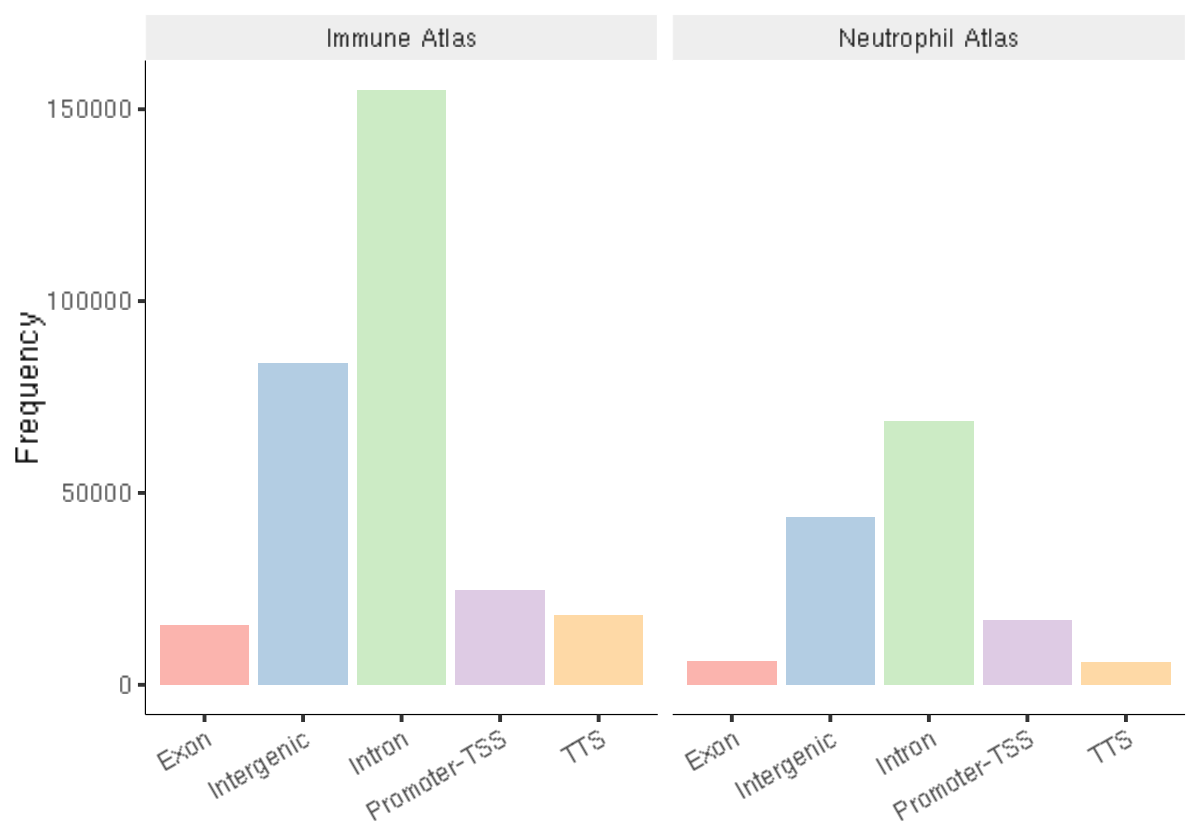

In [23]:
options(repr.plot.width=10, repr.plot.height=7)

dplyr::bind_rows(
    ia.homer.annot %>%
        dplyr::filter(!is.na(Annotation)) %>%
        dplyr::mutate(Annotation.Simple=gsub(" \\(.*\\)", "", Annotation)) %>%
        dplyr::count(Annotation.Simple, name="Frequency") %>%
        dplyr::mutate(Atlas="Immune Atlas"),
    na.homer.annot %>%
        dplyr::filter(!is.na(Annotation)) %>%
        dplyr::mutate(Annotation.Simple=gsub(" \\(.*\\)", "", Annotation)) %>%
        dplyr::count(Annotation.Simple, name="Frequency") %>%
        dplyr::mutate(Atlas="Neutrophil Atlas")
) %>% 
    dplyr::mutate(Annotation.Simple=plyr::revalue(Annotation.Simple, c("exon"="Exon", "intron"="Intron", "promoter-TSS"="Promoter-TSS"))) %>%
    ggplot() +
    geom_bar(aes(x=Annotation.Simple, y=Frequency, fill=Annotation.Simple), stat="identity") +
    xlab("Peak Annotation") +
    scale_fill_brewer(palette="Pastel1") + guides(fill="none") +
    facet_grid(. ~ Atlas) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_text(angle=30, hjust=1))

ggsave("03_Functional_Interpretation/results/homer_consensus_peaks_annotation.pdf", width=10, height=7)

In [24]:
dplyr::bind_rows(
    ia.homer.annot %>%
        dplyr::filter(!is.na(Annotation)) %>%
        dplyr::mutate(Annotation.Simple=gsub(" \\(.*\\)", "", Annotation)) %>%
        dplyr::count(Annotation.Simple, name="Frequency") %>%
        dplyr::mutate(Atlas="Immune Atlas"),
    na.homer.annot %>%
        dplyr::filter(!is.na(Annotation)) %>%
        dplyr::mutate(Annotation.Simple=gsub(" \\(.*\\)", "", Annotation)) %>%
        dplyr::count(Annotation.Simple, name="Frequency") %>%
        dplyr::mutate(Atlas="Neutrophil Atlas")
) %>%
    dplyr::group_by(Atlas) %>%
    dplyr::mutate(Total=sum(Frequency)) %>%
    dplyr::mutate(Prop=Frequency / Total)

Annotation.Simple,Frequency,Atlas,Total,Prop
<chr>,<int>,<chr>,<int>,<dbl>
exon,15523,Immune Atlas,296877,0.05228765
Intergenic,83779,Immune Atlas,296877,0.28220105
intron,154953,Immune Atlas,296877,0.52194343
promoter-TSS,24545,Immune Atlas,296877,0.08267734
TTS,18077,Immune Atlas,296877,0.06089054
exon,5951,Neutrophil Atlas,140829,0.04225692
Intergenic,43670,Neutrophil Atlas,140829,0.31009238
intron,68636,Neutrophil Atlas,140829,0.48737121
promoter-TSS,16687,Neutrophil Atlas,140829,0.11849122


## Group Peak Motifs

In [25]:
plot.data.ids <- dplyr::bind_rows(
        ia.group.motifs,
        na.group.motifs
    ) %>%
    dplyr::group_by(Group) %>%
    dplyr::slice_max(ENR_RATIO, n=5, with_ties=F) %>%
    dplyr::select(Group, ALT_ID, TF)

plot.data <- dplyr::bind_rows(
        ia.group.motifs,
        na.group.motifs
    ) %>%
    dplyr::filter(ALT_ID %in% plot.data.ids$ALT_ID) %>%
    dplyr::mutate(Log.Ratio=log2(ENR_RATIO)) %>%
    dplyr::select(ALT_ID, Group, Log.Ratio) %>%
    tidyr::spread(ALT_ID, Log.Ratio, fill=0)

rownames(plot.data) <- plot.data$Group
plot.data$Group <- NULL
plot.data <- as.matrix(plot.data)

max.enr <- max(max(ia.group.motifs$ENR_RATIO), max(na.group.motifs$ENR_RATIO))

In [26]:
col_fun = colorRamp2(c(0, max(log2(max.enr))), c("white", "royalblue4"))

ha_column = HeatmapAnnotation(
    year = anno_text(toupper(gsub(".*\\.", "", colnames(plot.data))), rot = 90, location = unit(1, "npc"), just = "right")
)

pdf("03_Functional_Interpretation/results/motif_enrichment_group_peaks.pdf", width=18, height=8.5)
Heatmap(plot.data, name="Enrichment", col=col_fun, show_column_names = FALSE, bottom_annotation = ha_column)
dev.off()

png 
  2

![Heatmap](../results/motif_enrichment_group_peaks.svg)